In [1]:

# imports
import os
import sys
import types
import json

# figure size/format
fig_width = 7
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = fig_dpi
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
if r'/Users/philtpatton/source/repos/philpatton.github.io':
  os.chdir(r'/Users/philtpatton/source/repos/philpatton.github.io')

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define


/var/folders/7b/nb0vyhy90mdf30_65xwqzl300000gn/T/ipykernel_6513/2448382509.py:24: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


{"/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/importlib/_bootstrap.py": 1703342552.9424675, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/importlib/_bootstrap_external.py": 1703342552.9466445, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/zipimport.py": 1703342551.0366228, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/codecs.py": 1703342550.4617856, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/encodings/aliases.py": 1703342551.8345973, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/encodings/__init__.py": 1703342551.8315241, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/encodings/utf_8.py": 1703342552.361053, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/abc.py": 1703342550.3190587, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/io.py": 1703342550.6952662, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/stat.py": 1703342550.9112048, "/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/_

In [2]:
# libraries 
import numpy as np
import pandas as pd
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt 
import seaborn as sns
from pymc.distributions.dist_math import binomln, logpow

plt.style.use('fivethirtyeight')
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['figure.facecolor'] = 'white'
pal = sns.color_palette("Set2")
sns.set_palette(pal)

# hyperparameters 
SEED = 808
RNG = np.random.default_rng(SEED)

def augment_history(history):
    '''Augment a capture history with all-zero histories.'''
    
    animals_captured, T = history.shape

    # create M - n all zero histories
    zero_history_count = M - animals_captured
    zero_history = np.zeros((zero_history_count, T))

    # tack those on to the capture history
    augmented = np.row_stack((history, zero_history))

    return augmented 

def get_behavior_covariate(history):
    
    # note the occasion when each individual was first seen
    first_seen = (history != 0).argmax(axis=1)
    
    # create the covariate for the behavior effect
    behavior_covariate = np.zeros_like(history)
    for i, f in enumerate(first_seen):
        behavior_covariate[i, (f + 1):] = 1

    return behavior_covariate

def get_occasion_covariate(history):

    _, T = history.shape
    l = []
    for t in range(T):
        oc = np.zeros_like(history)
        oc[:, t] = 1
        l.append(oc)

    return np.stack(l, axis=2)

def sim_N(idata):
    
    psi_samps = az.extract(idata).psi.values
    p_samps = az.extract(idata).p.values
    not_p = (1 - p_samps)
    
    if p_samps.ndim == 1:
        p_included = psi_samps * (not_p) ** T 
        number_undetected = RNG.binomial(M - n, p_included)

    elif p_samps.ndim == 3:
        p_included = psi_samps * not_p.prod(axis=1)
        number_undetected = RNG.binomial(1, p_included).sum(axis=0)

    N = n + number_undetected
    return N

# convert the dolphin capture history from '1001001' to array
dolphin = np.loadtxt('firth.txt', dtype=str)
dolphin = np.array([list(map(int, d)) for d in dolphin])

# augment the capture history with all zero histories
n, T = dolphin.shape
M = 500
dolphin_augmented = augment_history(dolphin)

# covariates for t and b
occasion_covariate = get_occasion_covariate(dolphin_augmented)
behavior_covariate = get_behavior_covariate(dolphin_augmented)

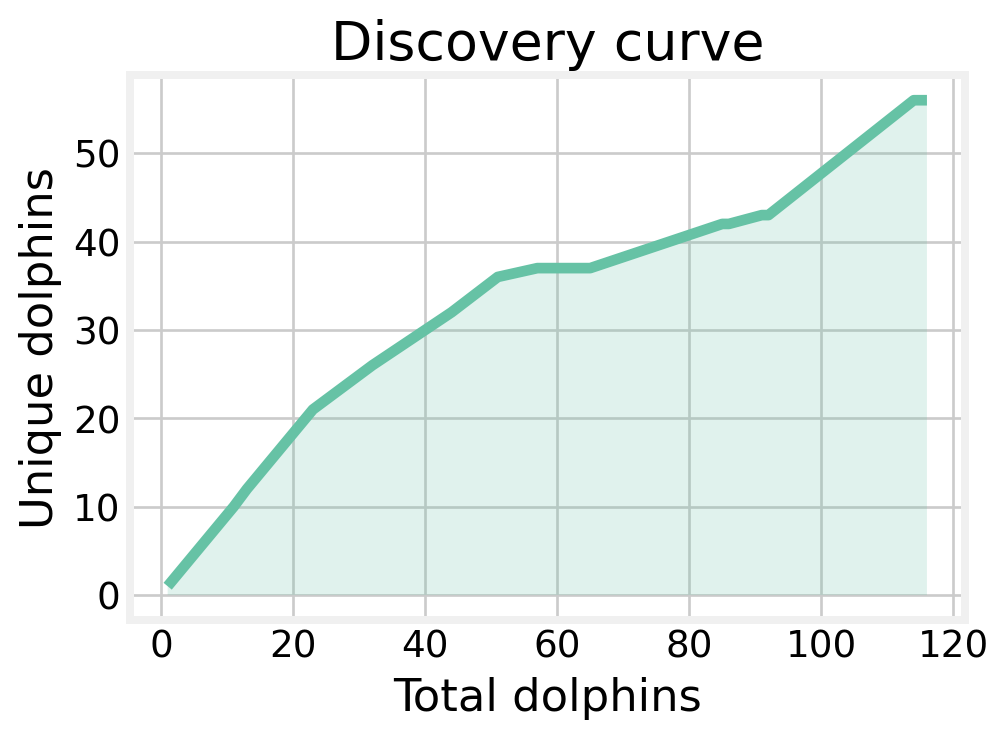

In [3]:
#| fig-cap: 'Discovery curve for the Moray Firth bottlenose dolphin surveys [@wilson1999].'
#| label: fig-discovery

# how many dolphins have been seen?
total_seen = dolphin.sum(axis=0).cumsum()

# how many new dolphins have been seen?
first_seen = (dolphin != 0).argmax(axis=1)
newbies = [sum(first_seen == t) for t in range(T)]
total_newbies = np.cumsum(newbies)

fig, ax = plt.subplots(figsize=(5, 3.5))
ax.plot(total_seen, total_newbies)
ax.fill_between(total_seen, total_newbies, alpha=0.2)
ax.set_title('Discovery curve')
ax.set_xlabel('Total dolphins')
ax.set_ylabel('Unique dolphins')
plt.show()

In [4]:
def logp(value, n, p, psi):
    
    binom = binomln(n, value) + logpow(p, value) + logpow(1 - p, n - value)
    bin_sum = pm.math.sum(binom, axis=1)
    bin_exp = pm.math.exp(bin_sum)

    res = pm.math.switch(
        value.sum(axis=1) > 0,
        bin_exp * psi,
        bin_exp * psi + (1 - psi)
    )
    
    return pm.math.log(res)

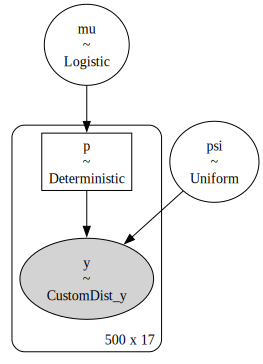

In [5]:
#| fig-cap: 'Visual representation of model $M_{0}$.'
#| label: fig-m0

with pm.Model() as m0:

    # Priors
    # inclusion
    psi = pm.Uniform('psi', 0, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # Linear model
    mu_matrix = (np.ones((T, M)) * mu).T
    p = pm.Deterministic('p', pm.math.invlogit(mu_matrix))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(m0)

In [6]:
with m0:
    m0_idata = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 2 seconds.


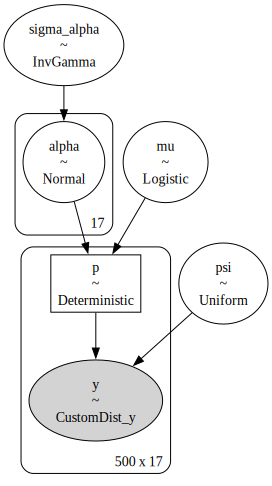

In [7]:
#| fig-cap: Visual representation of model $M_t$.
#| label: fig-mt

with pm.Model() as mt:

    # Priors
    # inclusion
    psi = pm.Uniform('psi', 0, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # time effect
    sigma_alpha = pm.InverseGamma('sigma_alpha', 4, 3)
    alpha = pm.Normal('alpha', 0, tau=1/sigma_alpha, shape=T)

    # Linear model
    nu = mu + pm.math.dot(occasion_covariate, alpha)
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mt)

In [8]:
with mt:
    mt_idata = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_alpha, alpha]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 28 seconds.


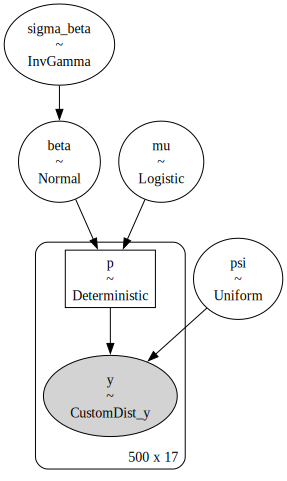

In [9]:
#| fig-cap: Visual representation of model $M_b$.
#| label: fig-mb

with pm.Model() as mb:

    # Priors
    # inclusion
    psi = pm.Uniform('psi', 0, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)
    
    # behavior effect
    sigma_beta = pm.InverseGamma('sigma_beta', 4, 3)
    beta = pm.Normal('beta', 0, tau=1/sigma_beta)

    # Linear model
    nu = mu + behavior_covariate * beta 
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mb)

In [10]:
with mb:
    mb_idata = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_beta, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 13 seconds.


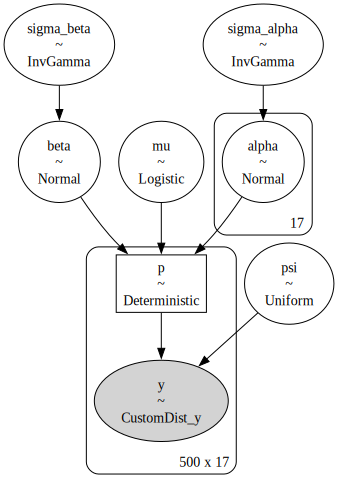

In [11]:
#| fig-cap: 'Visual representation of model $M_{tb}$.'
#| label: fig-mtb

with pm.Model() as mtb:

    # Priors
    # inclusion
    psi = pm.Uniform('psi', 0, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # time effect
    sigma_alpha = pm.InverseGamma('sigma_alpha', 4, 3)
    alpha = pm.Normal('alpha', 0, tau=1/sigma_alpha, shape=T)

    # behavior effect
    sigma_beta = pm.InverseGamma('sigma_beta', 4, 3)
    beta = pm.Normal('beta', 0, tau=1/sigma_beta)

    # Linear model
    nu = mu + pm.math.dot(occasion_covariate, alpha) + behavior_covariate * beta
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mtb)

In [12]:
with mtb:
    mtb_idata = pm.sample()

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_alpha, alpha, sigma_beta, beta]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 37 seconds.


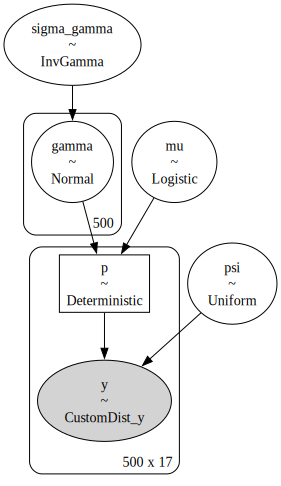

In [13]:
#| fig-cap: Visual representation of model $M_h$.
#| label: fig-mh

with pm.Model() as mh:

    # Priors
    # inclusion
    psi = pm.Uniform('psi', 0, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # individual effect
    sigma_gamma = pm.InverseGamma('sigma_gamma', 4, 3)
    gamma = pm.Normal('gamma', 0, tau=1/sigma_gamma, shape=M)

    # Linear model
    individual_effect = (np.ones((T, M)) * gamma).T
    nu = mu + individual_effect
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mh)

In [14]:
with mh:
    mh_idata = pm.sample(3000, target_accept=0.99)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_gamma, gamma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 92 seconds.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [15]:
az.summary(mh_idata, var_names=['psi', 'mu', 'sigma_gamma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
psi,0.184,0.038,0.122,0.253,0.002,0.001,608.0,1078.0,1.01
mu,-2.784,0.323,-3.377,-2.216,0.017,0.012,390.0,706.0,1.02
sigma_gamma,0.777,0.336,0.295,1.396,0.022,0.016,215.0,468.0,1.03


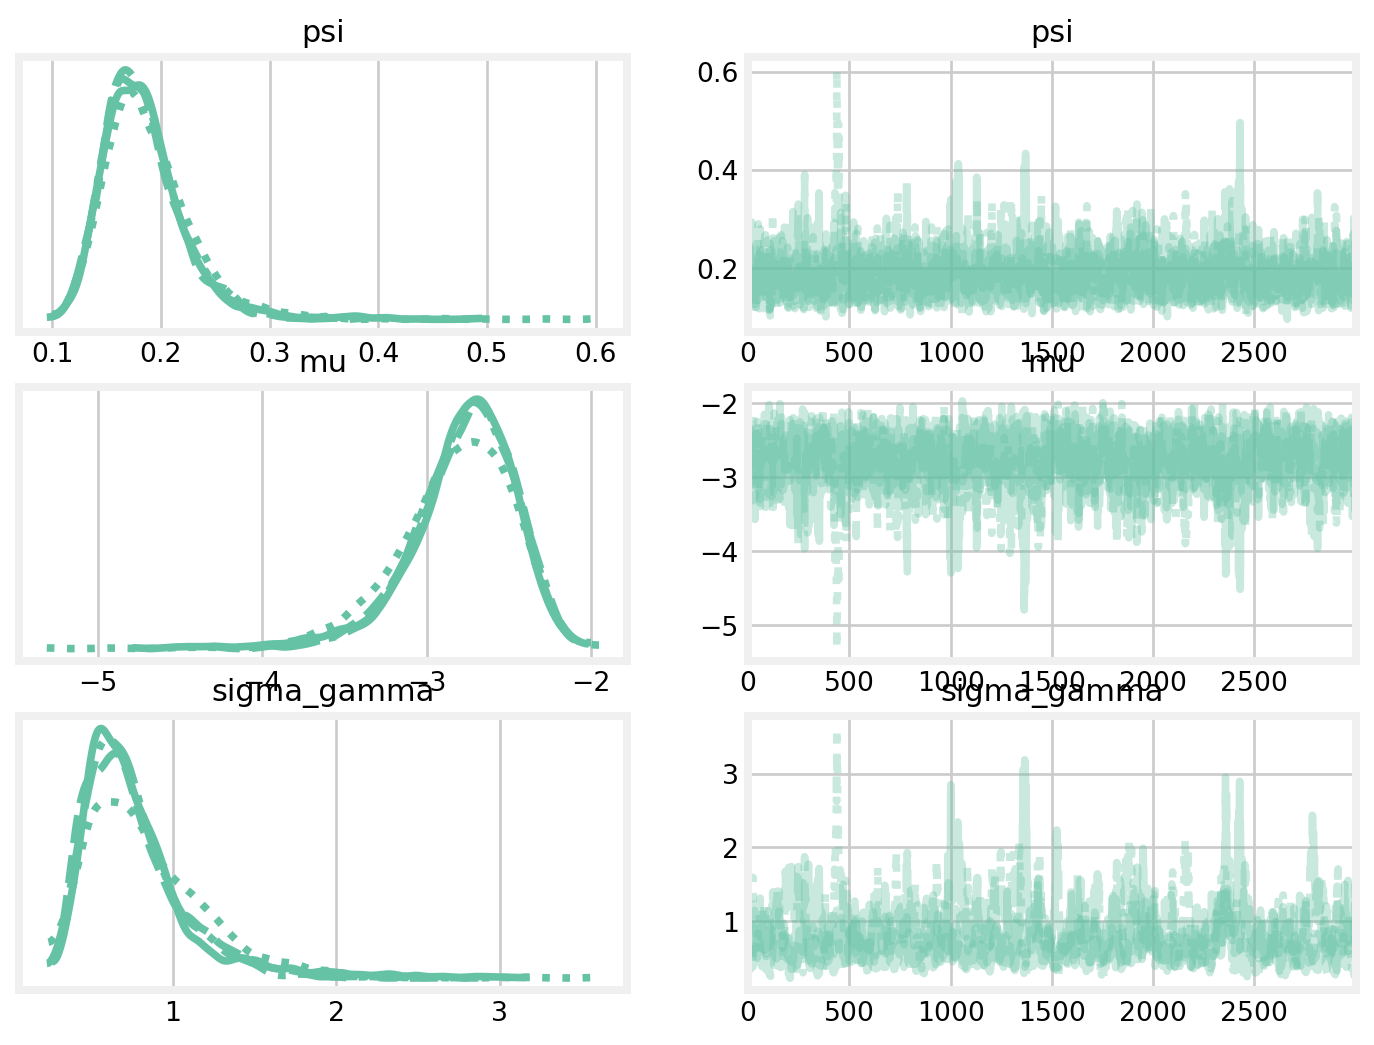

In [16]:
az.plot_trace(mh_idata, figsize=(8, 6), var_names=['psi', 'mu', 'sigma_gamma']);

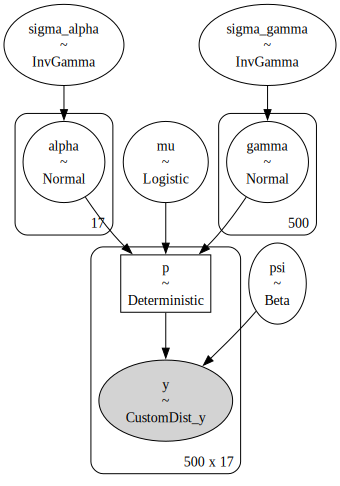

In [17]:
#| fig-cap: 'Visual representation of model $M_{th}$.'
#| label: fig-mth

with pm.Model() as mth:

    # Priors
    # inclusion
    psi = pm.Beta('psi', 1, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # time effect
    sigma_alpha = pm.InverseGamma('sigma_alpha', 4, 3)
    alpha = pm.Normal('alpha', 0, tau=1/sigma_alpha, shape=T)

    # individual effect
    sigma_gamma = pm.InverseGamma('sigma_gamma', 4, 3)
    gamma = pm.Normal('gamma', 0, tau=1/sigma_gamma, shape=M)

    # Linear model
    individual_effect = (np.ones((T, M)) * gamma).T
    nu = mu + pm.math.dot(occasion_covariate, alpha) + individual_effect
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mth)

In [18]:
with mth:
    mth_idata = pm.sample(draws=3000, target_accept=0.95)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_alpha, alpha, sigma_gamma, gamma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 213 seconds.


The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details


The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [19]:
az.summary(mth_idata, var_names=['psi', 'mu', 'sigma_alpha', 'sigma_gamma', 'alpha'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
psi,0.177,0.035,0.118,0.238,0.001,0.001,700.0,983.0,1.00
mu,-3.006,0.401,-3.775,-2.289,0.017,0.012,575.0,900.0,1.01
sigma_alpha,0.923,0.358,0.375,1.565,0.004,0.003,9159.0,7416.0,1.00
sigma_gamma,0.822,0.357,0.312,1.452,0.023,0.016,241.0,464.0,1.01
alpha[0],-1.107,0.617,-2.330,-0.006,0.006,0.005,11171.0,7188.0,1.00
alpha[1],0.563,0.414,-0.206,1.354,0.005,0.004,6862.0,6647.0,1.00
alpha[2],-0.807,0.557,-1.889,0.177,0.005,0.005,10878.0,8036.0,1.00
alpha[3],0.563,0.407,-0.210,1.331,0.005,0.003,7144.0,7485.0,1.00
alpha[4],0.449,0.415,-0.339,1.221,0.005,0.004,7572.0,7528.0,1.00
alpha[5],0.780,0.401,0.054,1.571,0.005,0.004,6376.0,7094.0,1.00


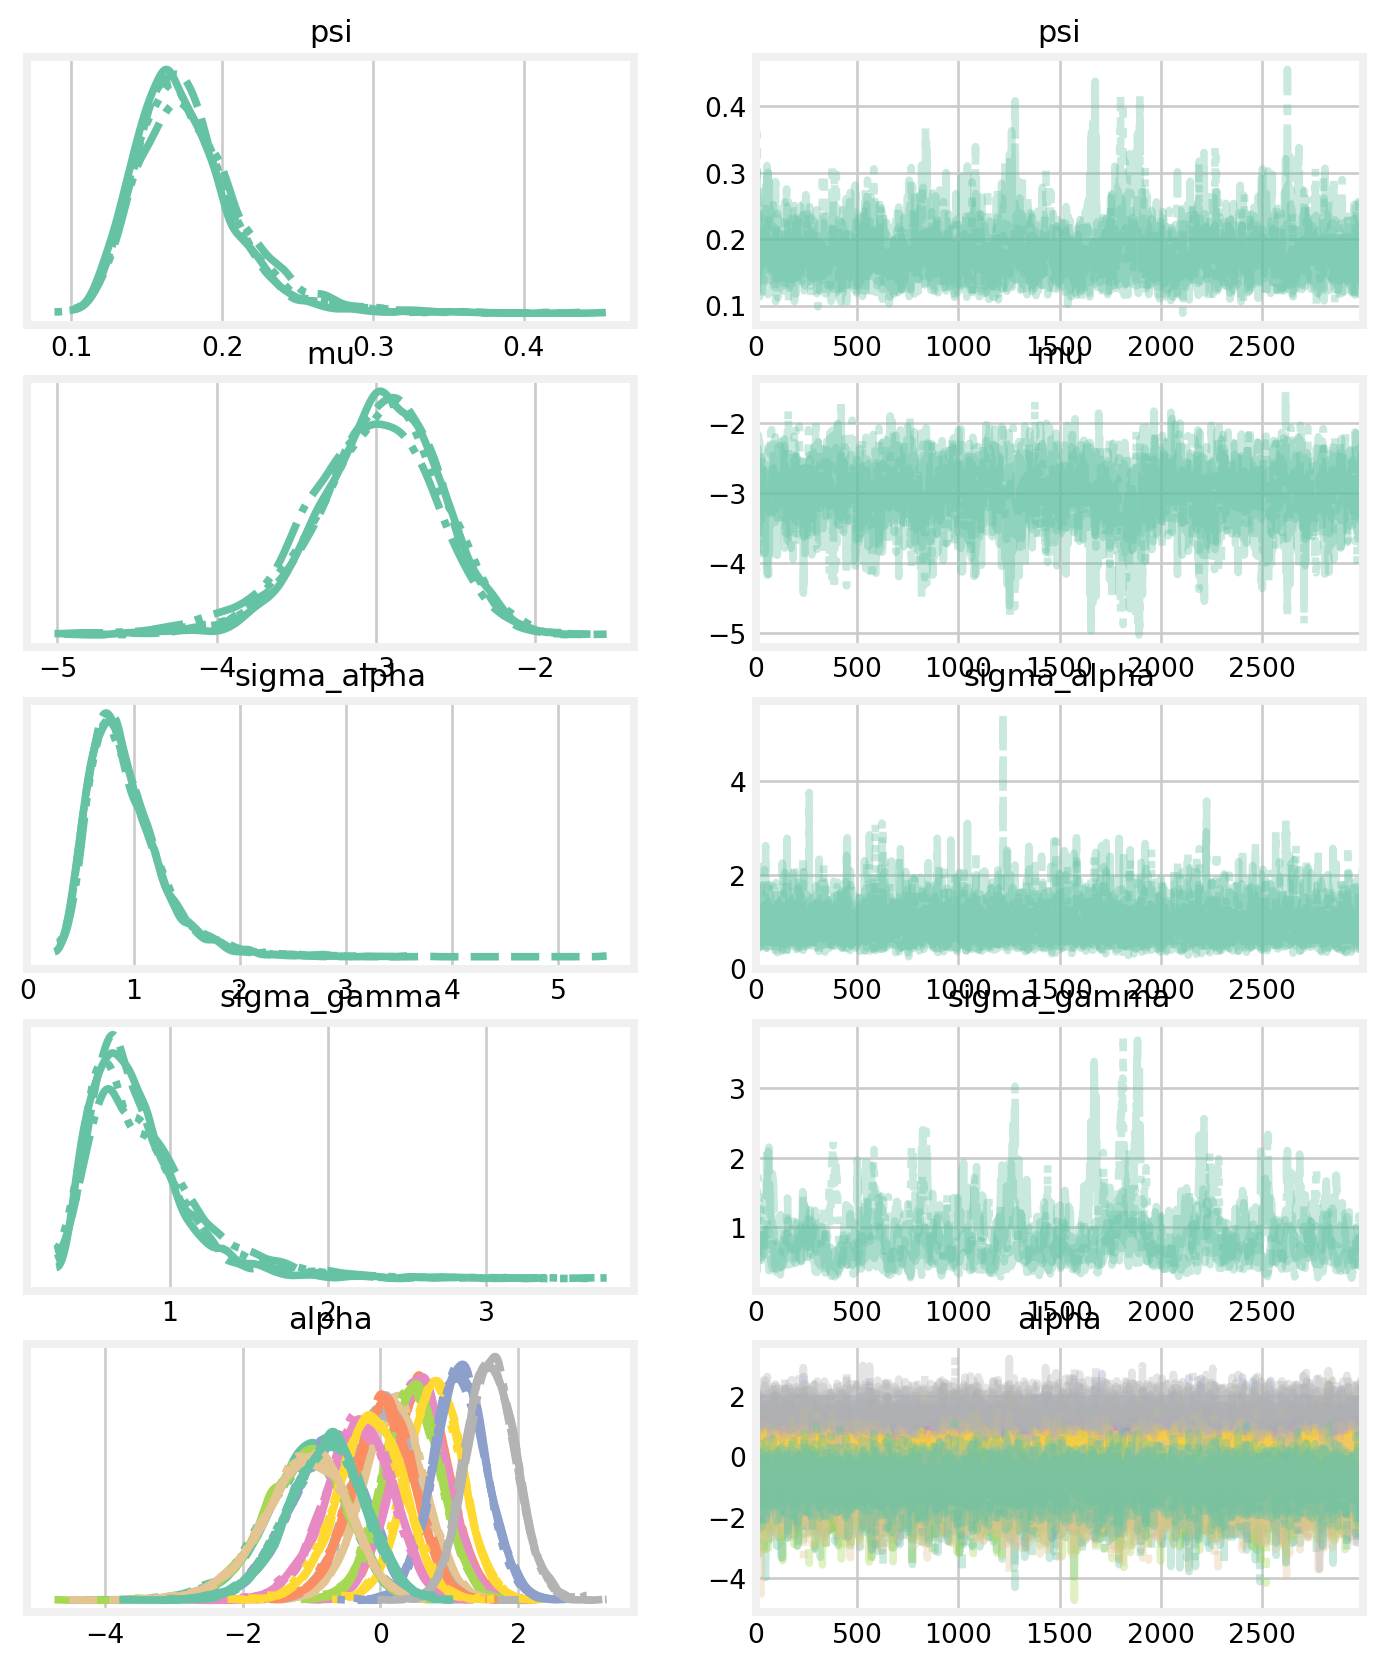

In [20]:
#| fig-cap: 'Trace plots for model $M_{th}$.'
#| label: fig-mth_trace

az.plot_trace(mth_idata, figsize=(8, 10),
              var_names=['psi', 'mu', 'sigma_alpha', 'sigma_gamma', 'alpha']);

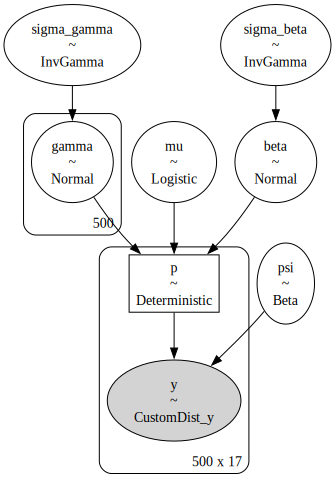

In [21]:
#| fig-cap: 'Visual representation of model $M_{bh}$.'
#| label: fig-mbh

with pm.Model() as mbh:

    # Priors
    # inclusion
    psi = pm.Beta('psi', 1, 1)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # behavior effect
    sigma_beta = pm.InverseGamma('sigma_beta', 4, 3)
    beta = pm.Normal('beta', 0, tau=1/sigma_beta)
    
    # individual effect
    sigma_gamma = pm.InverseGamma('sigma_gamma', 4, 3)
    gamma = pm.Normal('gamma', 0, tau=1/sigma_gamma, shape=M)

    # Linear model
    individual_effect = (np.ones((T, M)) * gamma).T
    nu = mu + behavior_covariate * beta + individual_effect
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mbh)

In [22]:
with mbh:
    mbh_idata = pm.sample(draws=3000, target_accept=0.95)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_beta, beta, sigma_gamma, gamma]


Sampling 4 chains for 1_000 tune and 3_000 draw iterations (4_000 + 12_000 draws total) took 359 seconds.


The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [23]:
az.summary(mbh_idata, var_names=['psi', 'mu', 'beta', 'sigma_gamma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
psi,0.551,0.190,0.251,0.925,0.010,0.007,385.0,1566.0,1.00
mu,-3.491,0.586,-4.582,-2.452,0.035,0.025,285.0,694.0,1.00
beta,-1.538,0.259,-2.013,-1.037,0.006,0.004,2013.0,4830.0,1.00
sigma_gamma,2.117,0.772,0.843,3.505,0.050,0.035,233.0,572.0,1.01


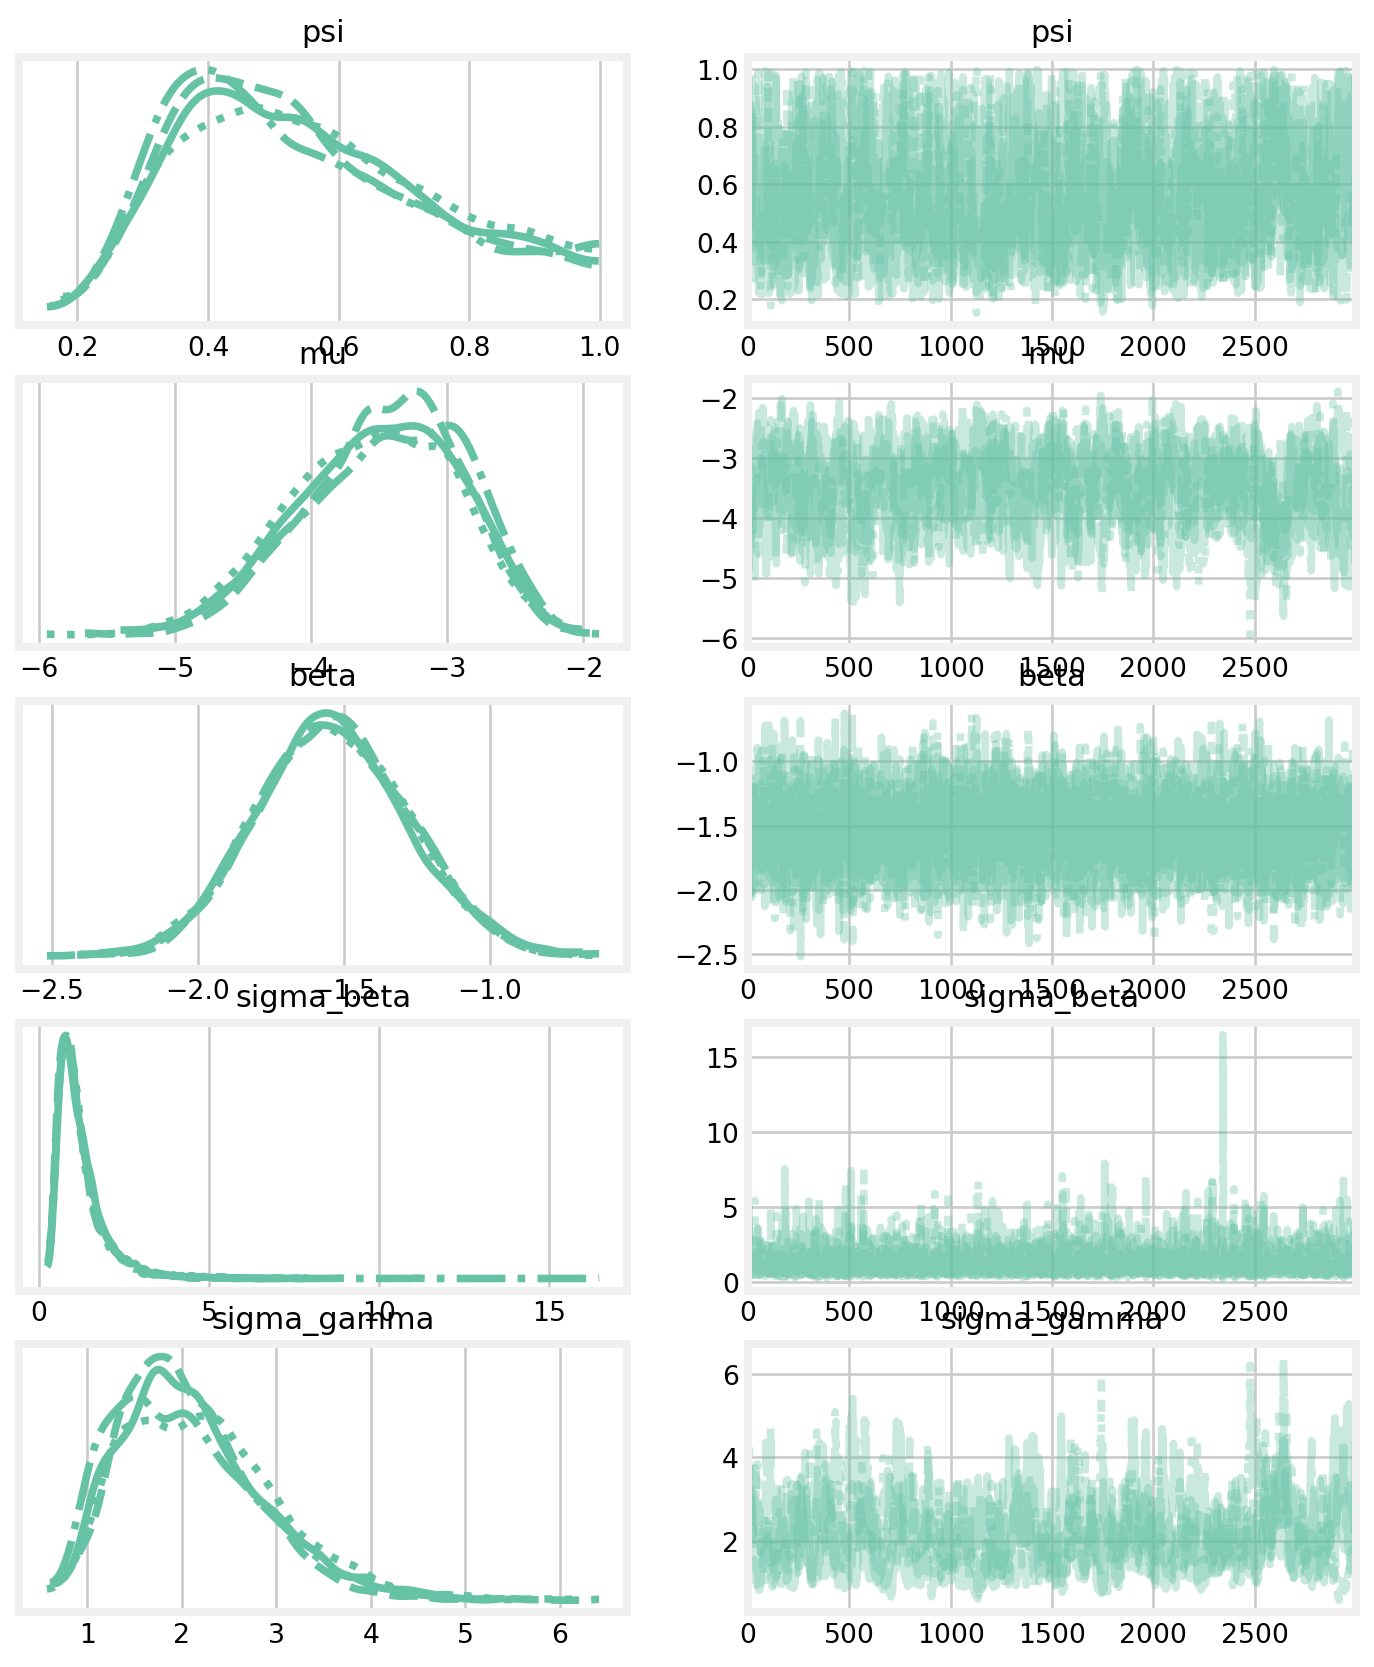

In [24]:
az.plot_trace(mbh_idata, figsize=(8, 10),
              var_names=['psi', 'mu', 'beta', 'sigma_beta', 'sigma_gamma']);

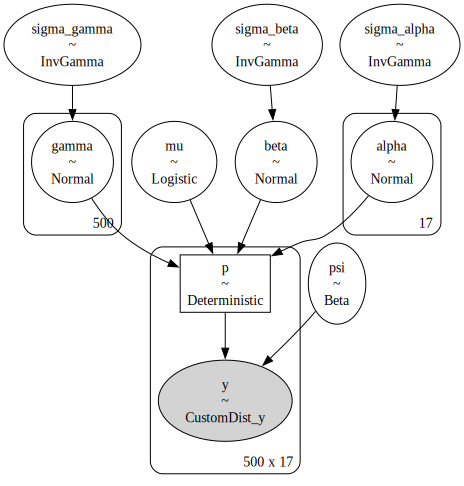

In [25]:
#| fig-cap: 'Visual representation of model $M_{tbh}$.'
#| label: fig-mtbh

with pm.Model() as mtbh:

    # Priors
    # inclusion
    psi = pm.Beta('psi', 1, 5)  

    # mean catchability 
    mu = pm.Logistic('mu', 0, 1)

    # time effect
    sigma_alpha = pm.InverseGamma('sigma_alpha', 4, 3)
    alpha = pm.Normal('alpha', 0, tau=1/sigma_alpha, shape=T)

    # behavior effect
    sigma_beta = pm.InverseGamma('sigma_beta', 4, 3)
    beta = pm.Normal('beta', 0, tau=1/sigma_beta)

    # individual effect
    sigma_gamma = pm.InverseGamma('sigma_gamma', 4, 3)
    gamma = pm.Normal('gamma', 0, tau=1/sigma_gamma, shape=M)

    # Linear model
    individual_effect = (np.ones((T, M)) * gamma).T
    nu = mu + pm.math.dot(occasion_covariate, alpha) + behavior_covariate * beta + individual_effect
    p = pm.Deterministic('p', pm.math.invlogit(nu))

    # Likelihood 
    pm.CustomDist(
        'y',
        1,
        p,
        psi,
        logp=logp,
        observed=dolphin_augmented
    )
    
pm.model_to_graphviz(mtbh)

In [26]:
with mtbh:
    mtbh_idata = pm.sample(draws=2000)

Auto-assigning NUTS sampler...


Initializing NUTS using jitter+adapt_diag...


Multiprocess sampling (4 chains in 4 jobs)


NUTS: [psi, mu, sigma_alpha, alpha, sigma_beta, beta, sigma_gamma, gamma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 90 seconds.


The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details


In [27]:
az.summary(mtbh_idata, 
           var_names=['psi', 'mu', 'alpha', 'beta', 'sigma_alpha', 'sigma_beta', 'sigma_gamma'])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
psi,0.713,0.102,0.522,0.898,0.002,0.001,3048.0,4771.0,1.0
mu,-3.100,0.466,-4.020,-2.262,0.015,0.010,997.0,2002.0,1.0
alpha[0],-3.116,0.699,-4.435,-1.844,0.011,0.008,3818.0,4897.0,1.0
alpha[1],-0.670,0.509,-1.608,0.297,0.010,0.007,2799.0,3931.0,1.0
alpha[2],-1.697,0.659,-2.967,-0.501,0.010,0.008,4092.0,4887.0,1.0
alpha[3],-0.053,0.488,-0.969,0.871,0.009,0.006,3164.0,4502.0,1.0
alpha[4],0.214,0.481,-0.677,1.126,0.008,0.006,3506.0,4991.0,1.0
alpha[5],0.835,0.451,-0.030,1.653,0.008,0.006,3053.0,4420.0,1.0
alpha[6],0.381,0.499,-0.537,1.307,0.008,0.005,4143.0,4921.0,1.0
alpha[7],0.380,0.509,-0.627,1.289,0.008,0.006,3847.0,4482.0,1.0


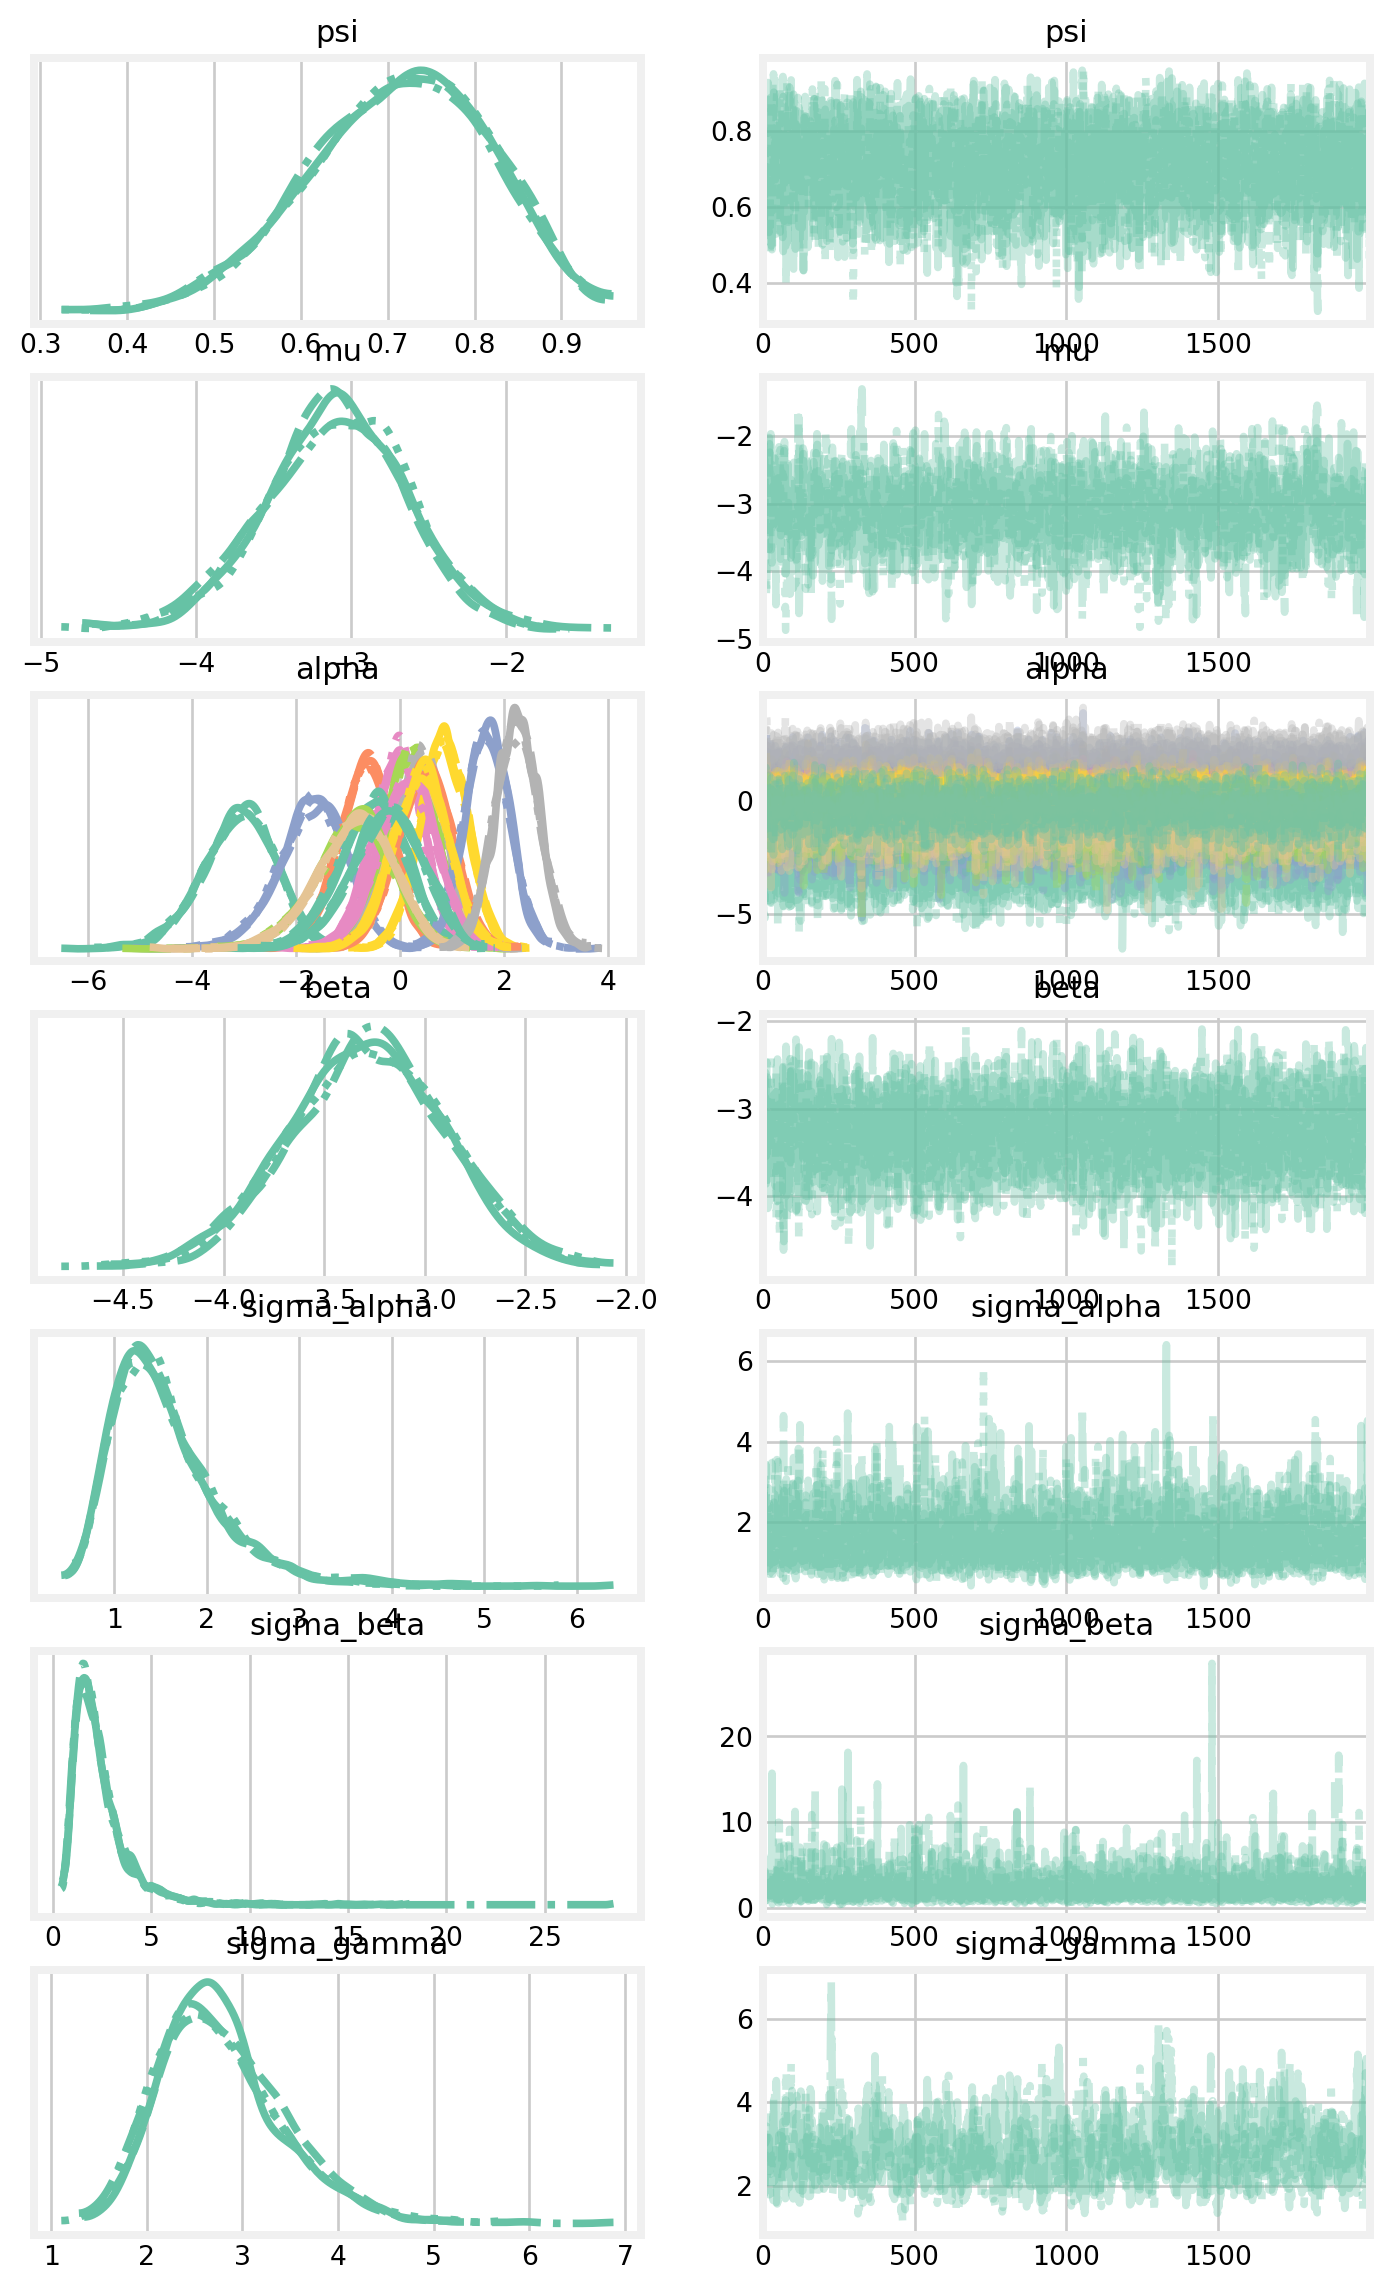

In [28]:
#| fig-cap: 'Trace plots for the model with $M_{tbh}$.'
#| label: fig-mtbh_trace

az.plot_trace(mtbh_idata, figsize=(8,14),
           var_names=['psi', 'mu', 'alpha', 'beta', 'sigma_alpha', 'sigma_beta', 'sigma_gamma']);

In [29]:
with m0:
    pm.compute_log_likelihood(m0_idata)

with mt:
    pm.compute_log_likelihood(mt_idata)

with mb:
    pm.compute_log_likelihood(mb_idata)

with mtb:
    pm.compute_log_likelihood(mtb_idata)

with mh:
    pm.compute_log_likelihood(mh_idata)

with mth:
    pm.compute_log_likelihood(mth_idata)

with mbh:
    pm.compute_log_likelihood(mbh_idata)

with mtbh:
    pm.compute_log_likelihood(mtbh_idata)

In [30]:
model_dict = {"m0": m0_idata, "mt": mt_idata, "mb": mb_idata, 
              "mtb": mtb_idata, "mh": mh_idata, "mth": mth_idata, 
              "mbh": mbh_idata, "mtbh": mtbh_idata}

comparison = az.compare(model_dict)

/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will ra

In [31]:
comparison.round(2)

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
mtbh,0,-430.62,87.06,0.00,0.97,57.18,0.00,True,log
mth,1,-489.22,38.02,58.60,0.00,58.89,11.21,True,log
mtb,2,-493.26,21.47,62.64,0.00,62.12,11.43,True,log
mt,3,-493.92,14.34,63.30,0.00,59.54,12.50,False,log
mbh,4,-495.19,68.06,64.57,0.00,60.82,11.47,True,log
mh,5,-518.62,25.59,88.00,0.03,61.47,15.31,True,log
mb,6,-521.53,5.45,90.91,0.00,63.17,15.28,False,log
m0,7,-522.55,2.50,91.93,0.00,62.10,16.12,False,log


In [32]:
good_dict = {"m0": m0_idata, "mt": mt_idata, "mb": mb_idata, "mtb": mtb_idata}
good_comparison = az.compare(good_dict)
good_comparison.round(2)

/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:805: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(
/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'True' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df_comp.loc[val] = (
/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/stats/stats.py:309: FutureWarning: Setting an item of incompatible dtype is deprecated and will ra

,rank,elpd_loo,p_loo,elpd_diff,weight,se,dse,warning,scale
mtb,0,-493.26,21.47,0.00,0.61,62.12,0.00,True,log
mt,1,-493.92,14.34,0.66,0.39,59.54,6.77,False,log
mb,2,-521.53,5.45,28.28,0.00,63.17,8.61,False,log
m0,3,-522.55,2.50,29.29,0.00,62.10,10.41,False,log


/Users/philtpatton/miniforge3/envs/pymc/lib/python3.11/site-packages/arviz/plots/backends/matplotlib/compareplot.py:87: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  scale = comp_df["scale"][0]


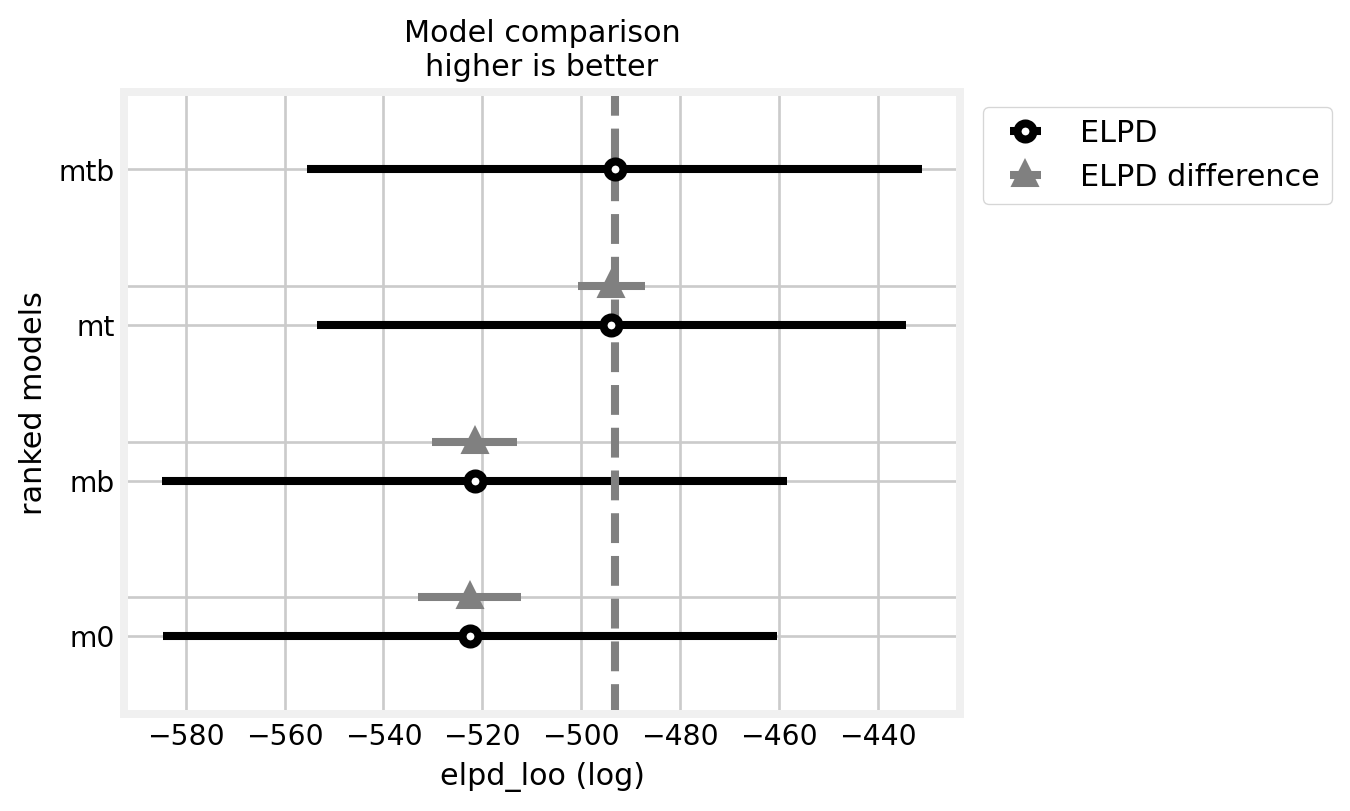

In [33]:
#| fig-cap: 'Differences in the ELPD criteria, calculated using loo, for each model [@vehtari2017].'
#| label: fig-comp

az.plot_compare(good_comparison, figsize=(5, 4));

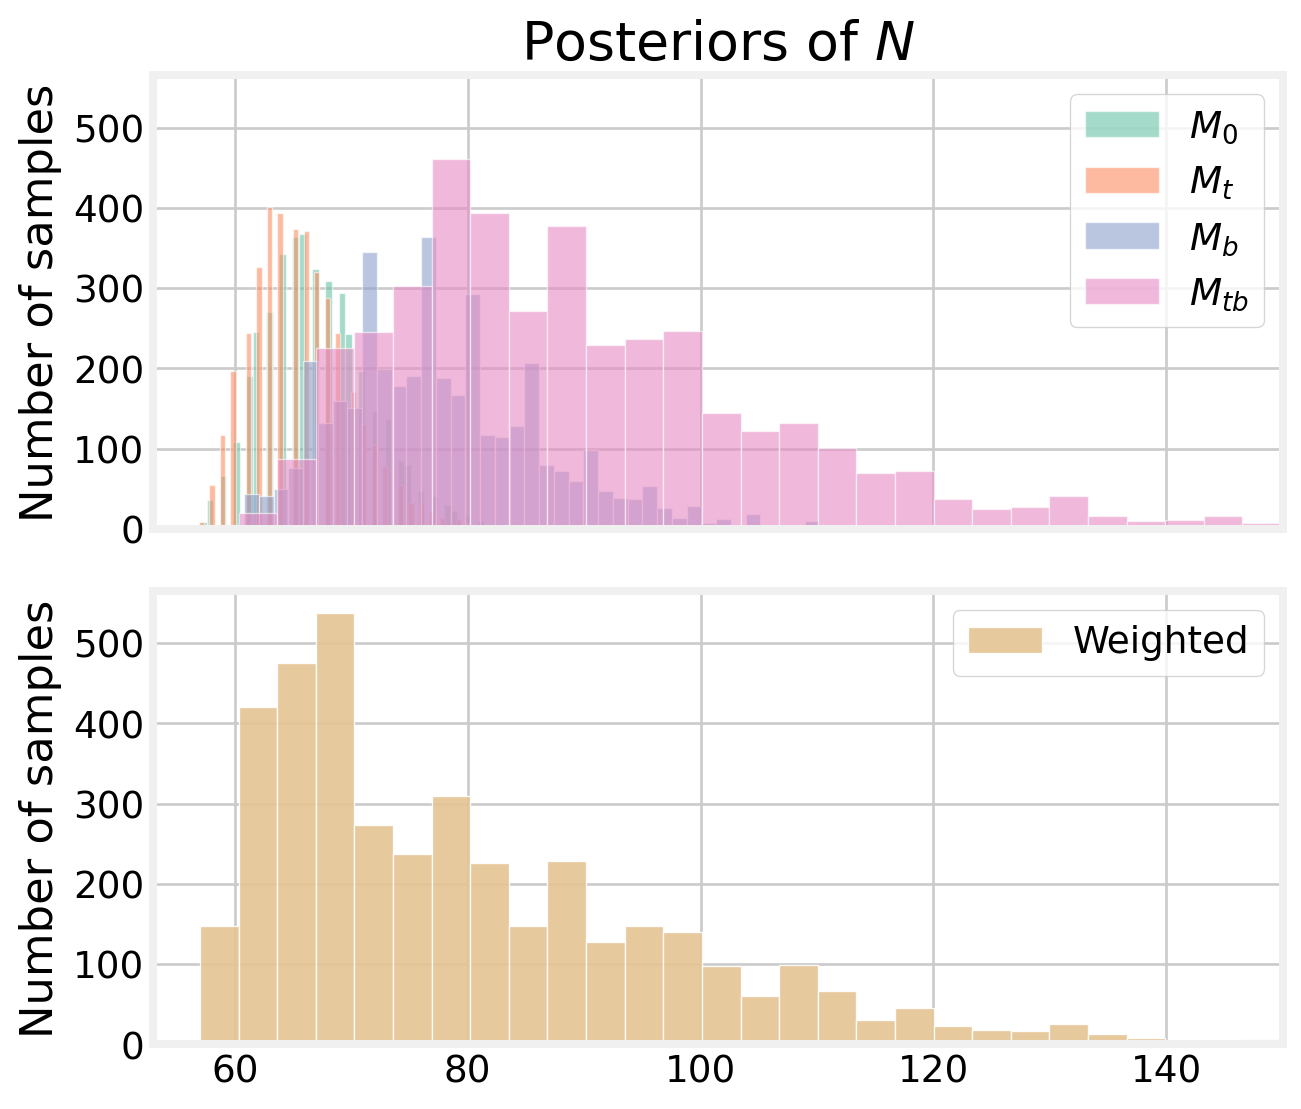

In [34]:
#| fig-cap: 'Posteriors of $N$ from the four models under consideration (top panel), with the model averaged posterior (bottom panel).'
#| label: fig-N

posteriors = [sim_N(good_dict[model]) for model in good_dict]
weights = [good_comparison.loc[model].weight for model in good_dict]
sample_count = len(posteriors[0])

l = []
for w, p in zip(weights, posteriors):
    weighted_sample = RNG.choice(p, size=int(w * sample_count))
    l.append(weighted_sample)

weighted_posterior = np.concatenate(l)

fig, (ax0, ax1) = plt.subplots(2, 1, figsize=(7, 6), sharex=True, sharey=True, tight_layout=True)

pal = sns.color_palette("Set2")

# labs = [k for k in good_dict.keys()]
labs = [r'$M_{0}$', r'$M_{t}$', r'$M_{b}$', r'$M_{tb}$']
for i, p in enumerate(posteriors):
    ax0.hist(p, color=pal[i], edgecolor='white', bins=60, alpha=0.6, label=labs[i])

ax0.set_title(r'Posteriors of $N$')
# ax1.set_title(r'Weighted posterior')

ax0.set_xlim((53, 150))
ax0.legend()

ax0.set_ylabel('Number of samples')
ax1.set_ylabel('Number of samples')

ax1.hist(weighted_posterior, edgecolor='white', bins=60, alpha=0.9, color=pal[6], label='Weighted')
ax1.legend()

plt.show()

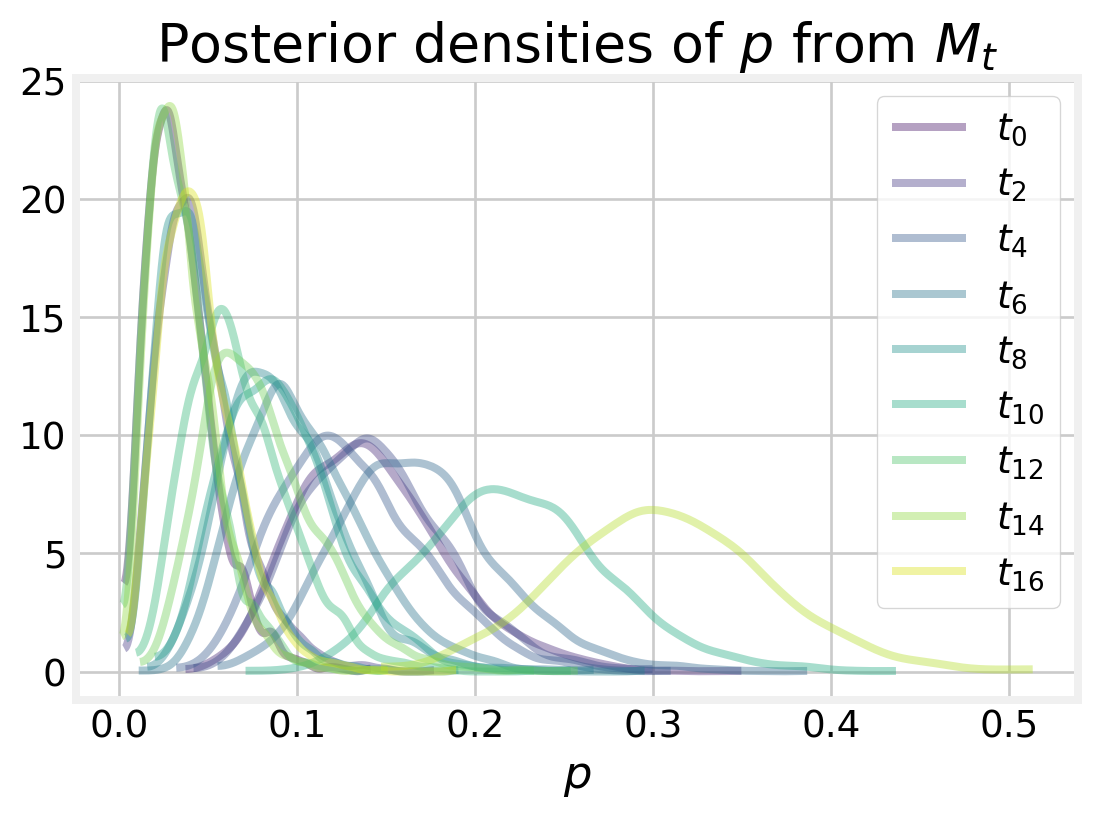

In [35]:
#| fig-cap: Posteriors of $p$ from model $M_t$
#| label: fig-p

p_samps = az.extract(mt_idata).p.mean(axis=0)

fig, ax = plt.subplots(figsize=(6, 4))

a = 0.4
# ax[0].set_title("Poisson")
pal = sns.color_palette('viridis', T)
for t in range(T):
    label_idx = t % 2
    if label_idx == 0:
        az.plot_dist(p_samps[t], ax=ax, color=pal[t], label=f'$t_{{{t}}}$',
                     plot_kwargs={'linewidth':3, 'alpha': a})
    else:
        az.plot_dist(p_samps[t], ax=ax, color=pal[t],
                     plot_kwargs={'linewidth':3, 'alpha': a})

ax.set_title(r'Posterior densities of $p$ from $M_t$')
ax.set_xlabel(r'$p$')

plt.show()